In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
%matplotlib inline


In [13]:
dt=0.005
nstep = 5000
# T=np.arange(dt,Tot,dt)


alpha = 1/0.024
beta = 1./1.
k = alpha
phi = 1.
g = beta*50

k*g*phi/alpha/beta,  beta*k/(alpha*beta+k*g*phi)

(49.99999999999999, 0.019607843137254905)

In [30]:
x = np.random.randn(nstep+99)
y = np.zeros(nstep)
z = np.zeros(nstep)
T = np.arange(100)*dt
tau_y = 0.08
Ky=T/tau_y/tau_y*np.exp(-T/tau_y)
s = np.convolve(x,Ky,'valid')*dt

for i in np.arange(nstep):
#     dyj =(-alpha*y[i]+k*(x[i+99]-z[i]))*dt  ##pure input
    dyj =(-alpha*y[i-1]+k*(s[i]-z[i-1]))*dt    ##input passsed though a time kernel 
    y[i] = (y[i-1]+dyj)
    dzj =(-beta*z[i-1]+g*y[i-1])*dt
    z[i] = (z[i-1]+dzj)

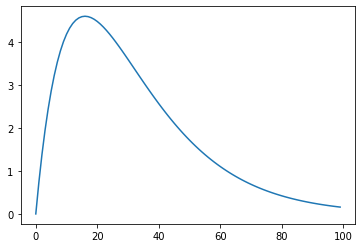

In [31]:
plt.plot(Ky)

In [32]:
# activation function
def nA(x,theta):
    y = np.zeros(len(x))
    y[np.where(x>theta)]= 1
    return(y)

def STA(r, x, v, dt, window):
    negshift=round(window[0]/dt) # second
    posshift=round(window[1]/dt) # second
    xSTS = np.zeros(posshift-negshift)
    vSTS = np.zeros(posshift-negshift)
    for i in np.arange(-negshift, len(r)-posshift):
        xSTS = xSTS + x[i+negshift:i+posshift]*r[i]
        vSTS = vSTS + v[i+negshift:i+posshift]*r[i]
        
    xSTA = xSTS/sum(r[-negshift:len(r)-posshift])
    vSTA = vSTS/sum(r[-negshift:len(r)-posshift])
    time = np.arange(negshift*dt, posshift*dt, dt)
    return time, xSTA, vSTA

In [33]:
sum(nA(y, np.std(y)))/len(y)

0.1728

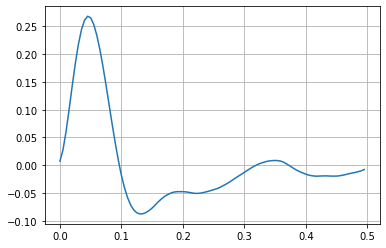

In [34]:
plt.plot(np.arange(0,100)*dt,np.correlate(y, x[99:], 'same')[2500:2600]*dt)
plt.grid()

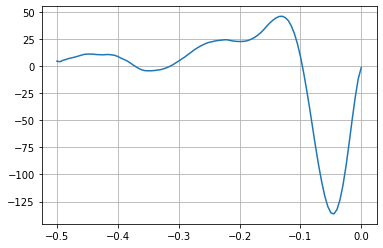

In [35]:
time, xSTA, _ = STA(y, x[99:], x[99:], dt, [-0.5,dt])
plt.plot(time, xSTA)
plt.grid()

In [9]:
temporal_kernel = np.correlate(y, x[99:], 'same')[2500:2600]*dt
# temporal_kernel = temporal_kernel/np.sqrt(sum(y**2))
# temporal_kernel = temporal_kernel/(y)
reconstruct_y = np.convolve(x,  temporal_kernel, 'valid')*dt

7.859920021739839

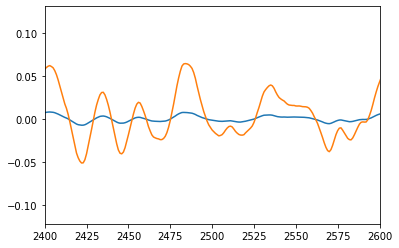

In [10]:
plt.plot(reconstruct_y)
plt.plot(y)

plt.xlim([2400,2600])
np.std(y)/np.std(reconstruct_y)

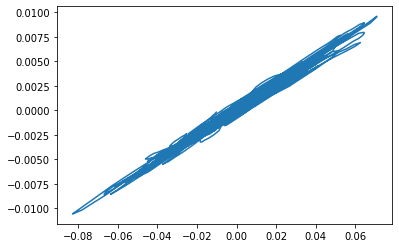

In [11]:
plt.plot(y[2000:3000],reconstruct_y[2000:3000])

In [12]:
np.flip(y)

array([0.05379331, 0.05869514, 0.06153301, ..., 0.04560109, 0.02546167,
       0.        ])